# Threshold Adjustment

👇 Load the player `player_performances.csv` dataset to see what you will be working with.

In [2]:
import pandas as pd
df = pd.read_csv("data/player_performances.csv")
df.head()

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers,target_5y
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [14]:
columns = df.columns[:-1]

ℹ️ Each observations represents a player and each column a characteristic of performance. The target `target_5y` defines whether the player has had a professional career of less than 5 years [0] or 5 years or more [1].

# Preprocessing

👇 To avoid spending too much time on the preprocessing, Robust Scale the entire feature set. This practice is not optimal, but can be used for preliminary preprocessing and/or to get models up and running quickly.

Save the scaled feature set as `X_scaled`.

In [17]:
X = df.drop(columns = "target_5y")
y = df["target_5y"]

from sklearn.preprocessing import RobustScaler as rs
scaler = rs()

scaler.fit(X)
X_scaled = scaler.transform(X)

### ☑️ Check your code

In [18]:
from nbresult import ChallengeResult

result = ChallengeResult('scaled_features',
                         scaled_features = X_scaled
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/03-Performance-metrics/03-Threshold-Adjustments
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_scaled_features.py::TestScaled_features::test_scaled_features PASSED [100%]

============================== 1 passed in 0.17s ===============================


💯 You can commit your code:

git add tests/scaled_features.pickle

git commit -m 'Completed scaled_features step'

git push origin master


# Base modelling

🎯 The task is to detect players who will last 5 years minimum as professionals, with a 90% guarantee.

👇 Is a default Logistic Regression model going to satisfy the coach's requirements? Use cross validation and save the score that supports your answer under variable name `base_score`.

In [23]:
cv_results['test_score'].mean()

0.6967654986522911

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

cv_results = cross_validate(LogisticRegression(max_iter=1000), X, y)
base_score = cv_results['test_score'].mean()

/home/cherif/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cherif/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

### ☑️ Check your code

In [25]:
from nbresult import ChallengeResult

result = ChallengeResult('base_precision',
                         score = base_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/03-Performance-metrics/03-Threshold-Adjustments
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_base_precision.py::TestBase_precision::test_precision_score PASSED [100%]

============================== 1 passed in 0.19s ===============================


💯 You can commit your code:

git add tests/base_precision.pickle

git commit -m 'Completed base_precision step'

git push origin master


# Threshold adjustment

👇 Find the decision threshold that guarantees a 90% precision for a player to last 5 years or more as a professional. Save the threshold under variable name `new_threshold`.

<details>
<summary>💡 Hint</summary>

- Make cross validated probability predictions with [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)
    
- Plug the probabilities into [`precision_recall_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) to generate precision scores at different thresholds

- Find out which threshold guarantees a precision of 0.9
      
</details>



In [29]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(LogisticRegression(), X, y, cv=5, method='predict_proba')

/home/cherif/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cherif/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

In [68]:
p_pred = y_pred.T[1]


In [76]:
import numpy as np
from sklearn.metrics import precision_recall_curve

y=df.target_5y

In [70]:
precision, recall, thresholds = precision_recall_curve(y, p_pred)
precision

array([0.62433862, 0.62405446, 0.62452687, ..., 1.        , 1.        ,
       1.        ])

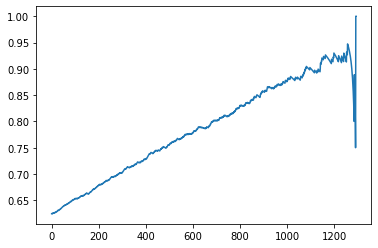

In [71]:
scores = pd.DataFrame({'threshold':thresholds,
                       'precision': precision[:-1],
                       'recall':recall[:-1]})# Store in dataframe
df2=scores[scores["precision"]>=0.9]
df2
scores
plt.plot(scores["precision"])

In [73]:
df2=scores[scores["precision"]>=0.9]
df2
new_threshold = 0.846426

### ☑️ Check your code

In [74]:
from nbresult import ChallengeResult

result = ChallengeResult('decision_threshold',
                         threshold = new_threshold
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/03-Performance-metrics/03-Threshold-Adjustments
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_decision_threshold.py::TestDecision_threshold::test_new_threshold PASSED [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/decision_threshold.pickle

git commit -m 'Completed decision_threshold step'

git push origin master


# Using the new threshold

🎯 The coach has spotted a potentially interesting player, but wants your 90% guarantee that he would last 5 years minimum as a pro. Download the player's data [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_New_player.csv).

❓ Would you risk recommending the player to the coach? Save your answer as string under variable name `recommendation` as "recommend" or "not recommend".

In [79]:
df1=pd.read_csv("data/ML_New_player.csv")
df1.head()
X1=df1

model = LogisticRegression()
model.fit(X,y)
y1=model.predict_proba(X1)

y1

recommendation = "recommend"

/home/cherif/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### ☑️ Check your code

In [80]:
from nbresult import ChallengeResult

result = ChallengeResult('recommendation',
                         recommendation = recommendation
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/03-Performance-metrics/03-Threshold-Adjustments
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_recommendation.py::TestRecommendation::test_recommendation PASSED [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/recommendation.pickle

git commit -m 'Completed recommendation step'

git push origin master


# 🏁